Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [649]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [650]:
#columnas a eliminar
columnas <- c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [651]:
#Dejamos las columnas de interés
df_madrid <- airbnb[columnas]
summary(df_madrid)

        City                 Room.Type        Neighbourhood   Accommodates   
 Madrid   :13207   Entire home/apt:8976              :5229   Min.   : 1.000  
 Barcelona:  292   Private room   :5595   Malasaña   : 895   1st Qu.: 2.000  
 London   :  132   Shared room    : 209   La Latina  : 810   Median : 3.000  
 Paris    :  108                          Embajadores: 795   Mean   : 3.278  
 马德里   :   52                          Sol        : 716   3rd Qu.: 4.000  
 Palma    :   49                          Justicia   : 559   Max.   :16.000  
 (Other)  :  940                          (Other)    :5776                   
   Bathrooms        Bedrooms           Beds            Price       
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Min.   :  9.00  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 34.00  
 Median :1.000   Median : 1.000   Median : 2.000   Median : 55.00  
 Mean   :1.282   Mean   : 1.344   Mean   : 2.044   Mean   : 73.56  
 3rd Qu.:1.000   3rd Qu.: 2.000   3rd Q

In [652]:
# filtramos para la condición: subset(df_madrid, City == "Madrid" & 
# Room.Type == "Entire home/apt" & !is.na(Neighbourhood))

df_madrid <- subset(df_madrid, City == "Madrid" & Room.Type == "Entire home/apt" & Neighbourhood != '')
summary(df_madrid)

# se eliminan las columnas que no son necesarias

df_madrid <- select(df_madrid, -Room.Type, -City)
summary(df_madrid)

          City                Room.Type        Neighbourhood   Accommodates   
 Madrid     :5601   Entire home/apt:5601   Malasaña   : 679   Min.   : 1.000  
            :   0   Private room   :   0   Embajadores: 585   1st Qu.: 3.000  
 Alaró      :   0   Shared room    :   0   La Latina  : 571   Median : 4.000  
 Albert Park:   0                          Sol        : 536   Mean   : 4.101  
 Alcudia    :   0                          Cortes     : 441   3rd Qu.: 5.000  
 Alcúdia    :   0                          Justicia   : 384   Max.   :16.000  
 (Other)    :   0                          (Other)    :2405                   
   Bathrooms        Bedrooms           Beds            Price       
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Min.   : 10.00  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 56.00  
 Median :1.000   Median : 1.000   Median : 2.000   Median : 75.00  
 Mean   :1.248   Mean   : 1.453   Mean   : 2.393   Mean   : 88.74  
 3rd Qu.:1.000   3rd Qu.: 2.

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [653]:
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.092903
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [654]:
#obtengo el total de registros con NA en Square.Meters
num_NA <- sum(is.na(df_madrid$Square.Meters))
paste('Total de registros con NA: ',num_NA)
paste('El porcentaje de departamentos que no muestran los metros cuadrados es: ', (num_NA/nrow(df_madrid))*100);

[1] "Total de registros con NA:  5254"

[1] "El porcentaje de departamentos que no muestran los metros cuadrados es:  93.8046777361185"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [655]:
library(dplyr)

distinto_na <- sum(!is.na(df_madrid$Square.Meters))
num_CEROS <- df_madrid %>% filter(Square.Meters == 0) %>% nrow()

paste('Todos los apartamentos que tienen un valor de metros cuadrados diferente de NA:  ', distinto_na)
paste()
paste('Porcentaje de los apartamentos tienen 0 metros cuadrados   ', num_CEROS/distinto_na*100)


[1] "Todos los apartamentos que tienen un valor de metros cuadrados diferente de NA:   347"

character(0)

[1] "Porcentaje de los apartamentos tienen 0 metros cuadrados    36.8876080691643"

Reemplazar todos los 0m^2 por NA 

In [656]:
df_madrid <- df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters == 0, NA, Square.Meters))
summary(df_madrid)


     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

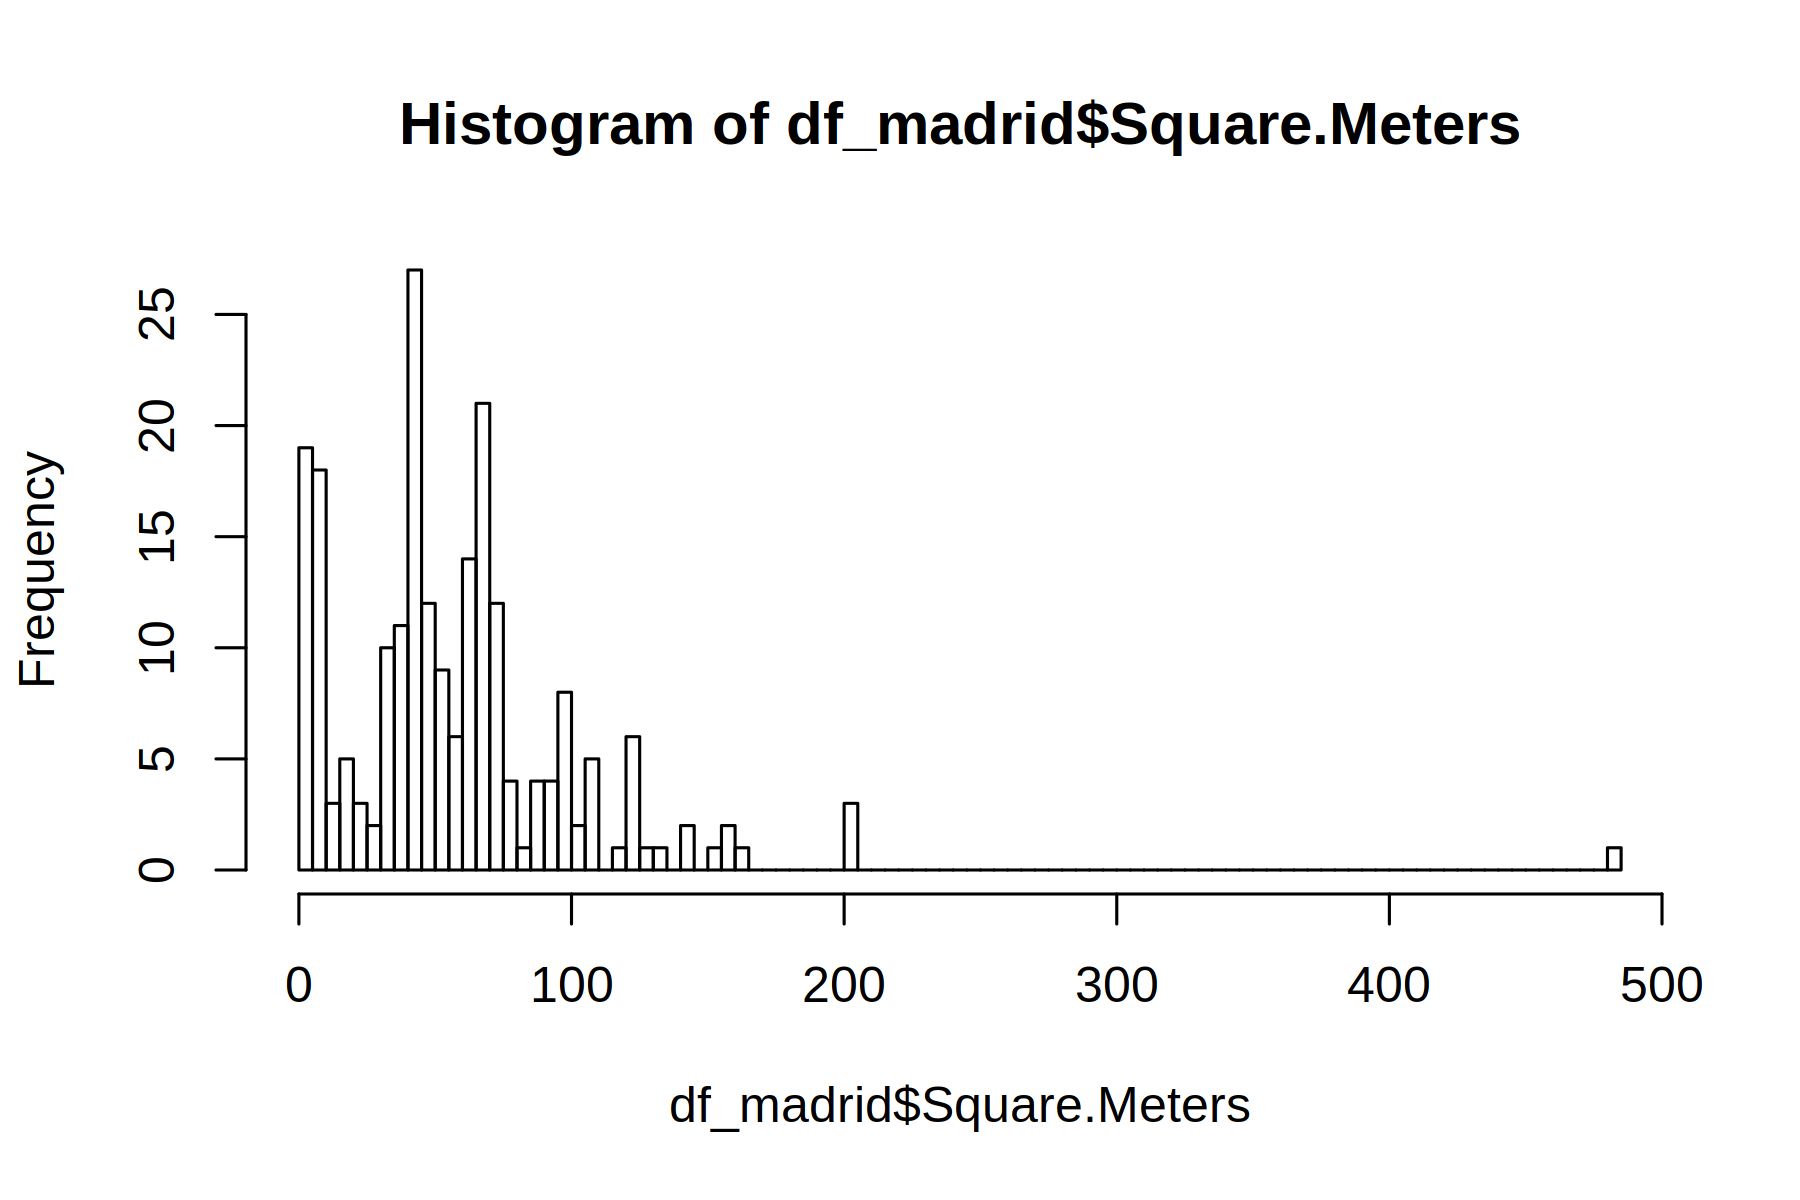

In [657]:
hist(df_madrid$Square.Meters, breaks = 100)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

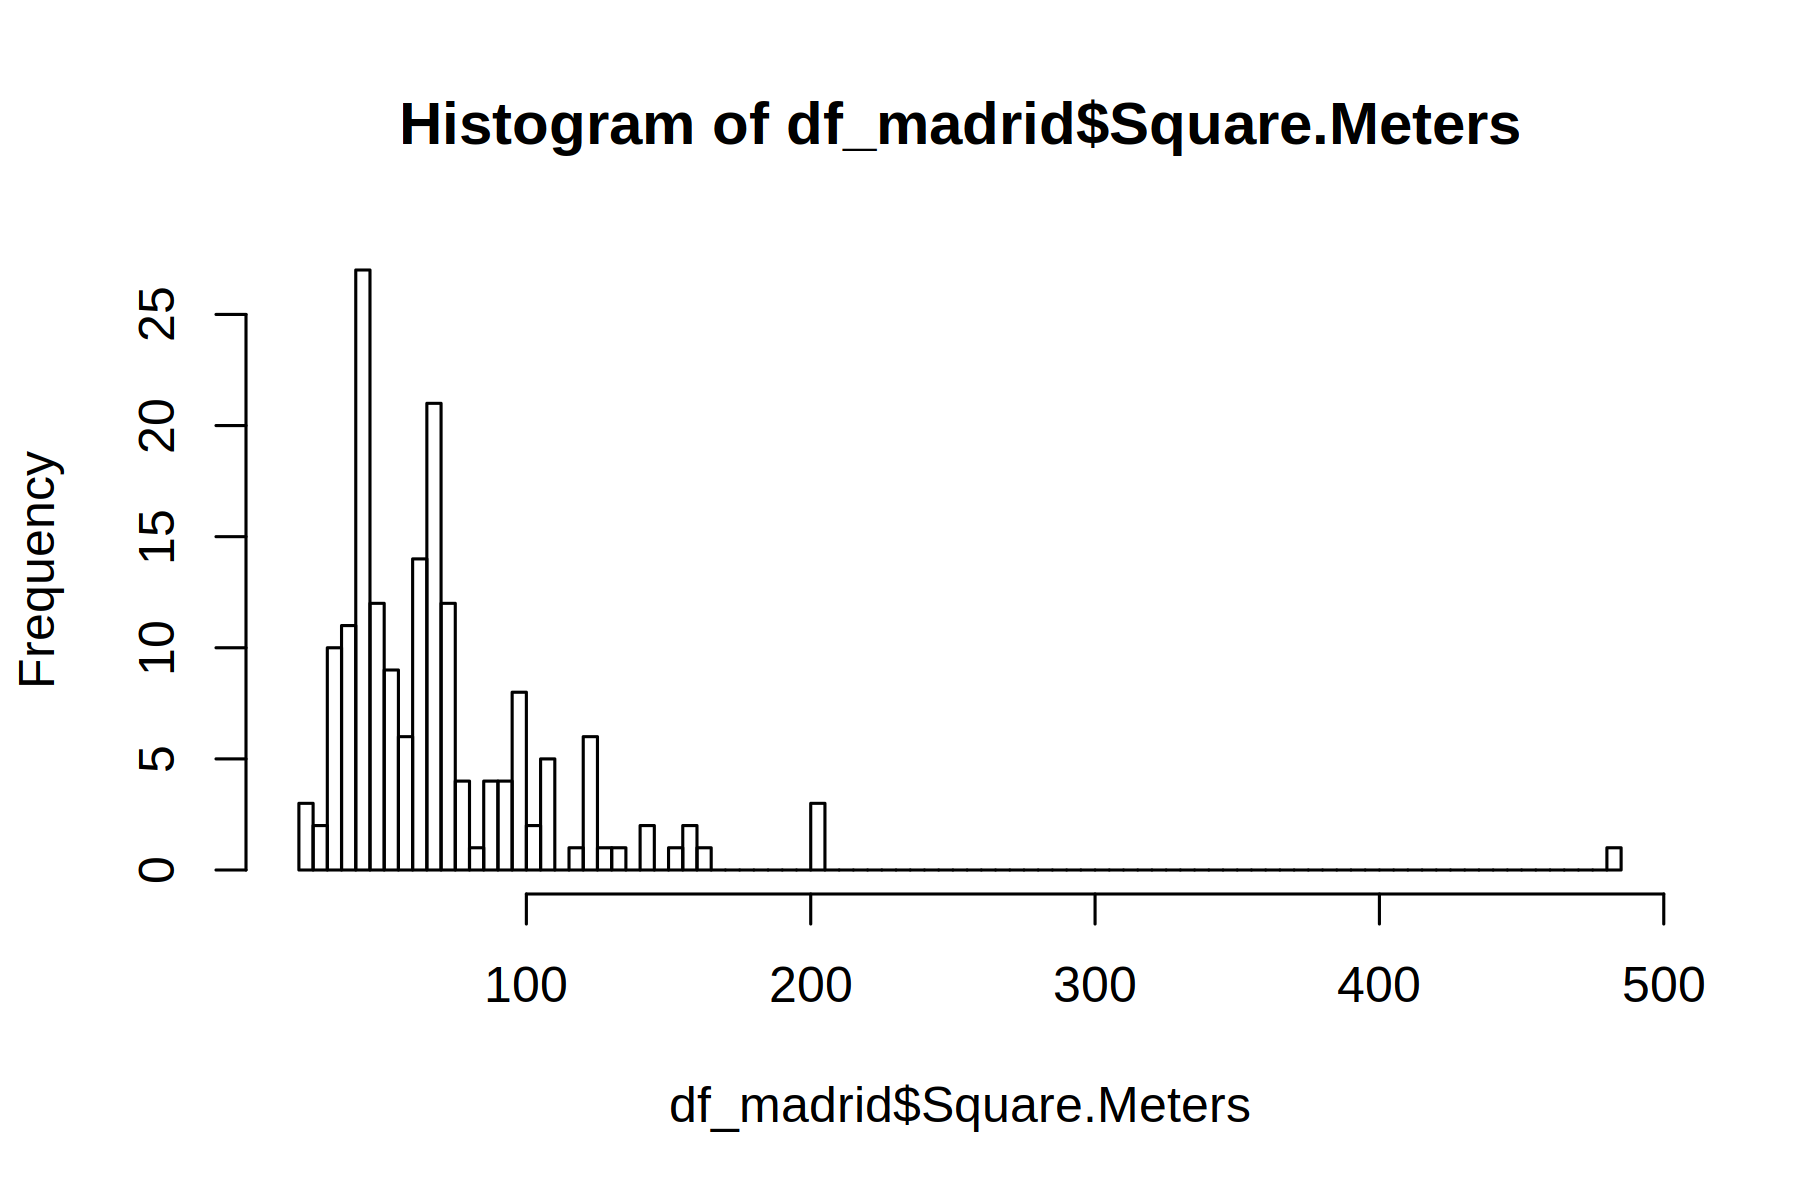

In [658]:
df_madrid <- df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters < 20, NA, Square.Meters))
summary(df_madrid)
hist(df_madrid$Square.Meters, breaks = 100)

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [659]:
#obtiene un vector con los barrios 
barrios <- levels(factor(df_madrid$Neighbourhood))
paste('Barrios registrados: ')
paste(barrios)
borrar <- c()

for (b in barrios) {
    #obtiene el número de filas del barrio
    n <- sum(df_madrid$Neighbourhood == b)
    #obtine el número de filas de Square.Meters con NA
    n2 <- sum(is.na(df_madrid$Square.Meters & df_madrid$Neighbourhood == b))

    if (n == n2)
        borrar <- c(borrar,b)
    }

paste('Barrios a borrar: ')
paste(borrar)


[1] "Barrios registrados: "

[1] "Acacias"             "Adelfas"             "Almagro"            
 [4] "Almenara"            "Aluche"              "Arapiles"           
 [7] "Arganzuela"          "Argüelles"           "Atocha"             
[10] "Barajas"             "Bellas Vistas"       "Berruguete"         
[13] "Carabanchel"         "Castellana"          "Castilla"           
[16] "Castillejos"         "Centro"              "Chamberí"           
[19] "Ciudad Jardin"       "Ciudad Lineal"       "Cortes"             
[22] "Cuatro Caminos"      "Delicias"            "El Tréntaiseis"     
[25] "El Viso"             "Embajadores"         "Estrella"           
[28] "Fuencarral-el Pardo" "Fuencarral-El Pardo" "Fuente del Berro"   
[31] "Gaztambide"          "Goya"                "Guindalera"         
[34] "Hispanoamérica"      "Hortaleza"           "Ibiza"              
[37] "Imperial"            "Jerónimos"           "Justicia"           
[40] "La Chopera"          "La Latina"           "Legazpi"            
[43] "Lista"               "Malasaña"            "Moncloa"            
[46] "Moratalaz"           "Nueva España"        "Pacifico"           
[49] "Palacio"             "Palos do Moguer"     "Prosperidad"        
[52] "Puente de Vallecas"  "Recoletos"           "Retiro"             
[55] "Rios Rosas"          "San Blas"            "Sol"                
[58] "Tetuán"              "Trafalgar"           "Usera"              
[61] "Valdeacederas"       "Vallehermosa"        "Vicálvaro"          
[64] "Villa de Vallecas"   "Villaverde"

[1] "Barrios a borrar: "

[1] "Aluche"              "Arganzuela"          "Atocha"             
 [4] "Bellas Vistas"       "Berruguete"          "Castillejos"        
 [7] "Delicias"            "Estrella"            "Fuencarral-el Pardo"
[10] "Fuencarral-El Pardo" "Gaztambide"          "Guindalera"         
[13] "Hispanoamérica"      "Hortaleza"           "Ibiza"              
[16] "Imperial"            "La Chopera"          "Legazpi"            
[19] "Moncloa"             "Nueva España"        "Prosperidad"        
[22] "Puente de Vallecas"  "Tetuán"              "Valdeacederas"      
[25] "Vallehermosa"        "Villa de Vallecas"   "Villaverde"

In [660]:
#elimina los barrios en donde todos sus valores fueron NA
df_madrid <- subset(df_madrid, !(Neighbourhood %in% borrar))
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms    
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.00  
 Sol        : 536   Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.00  
 (Other)    :1705                    NA's   :14      NA's   :7      
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 323.0   Median : 2.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 406.7   Mean   : 1.954  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :800.00  

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

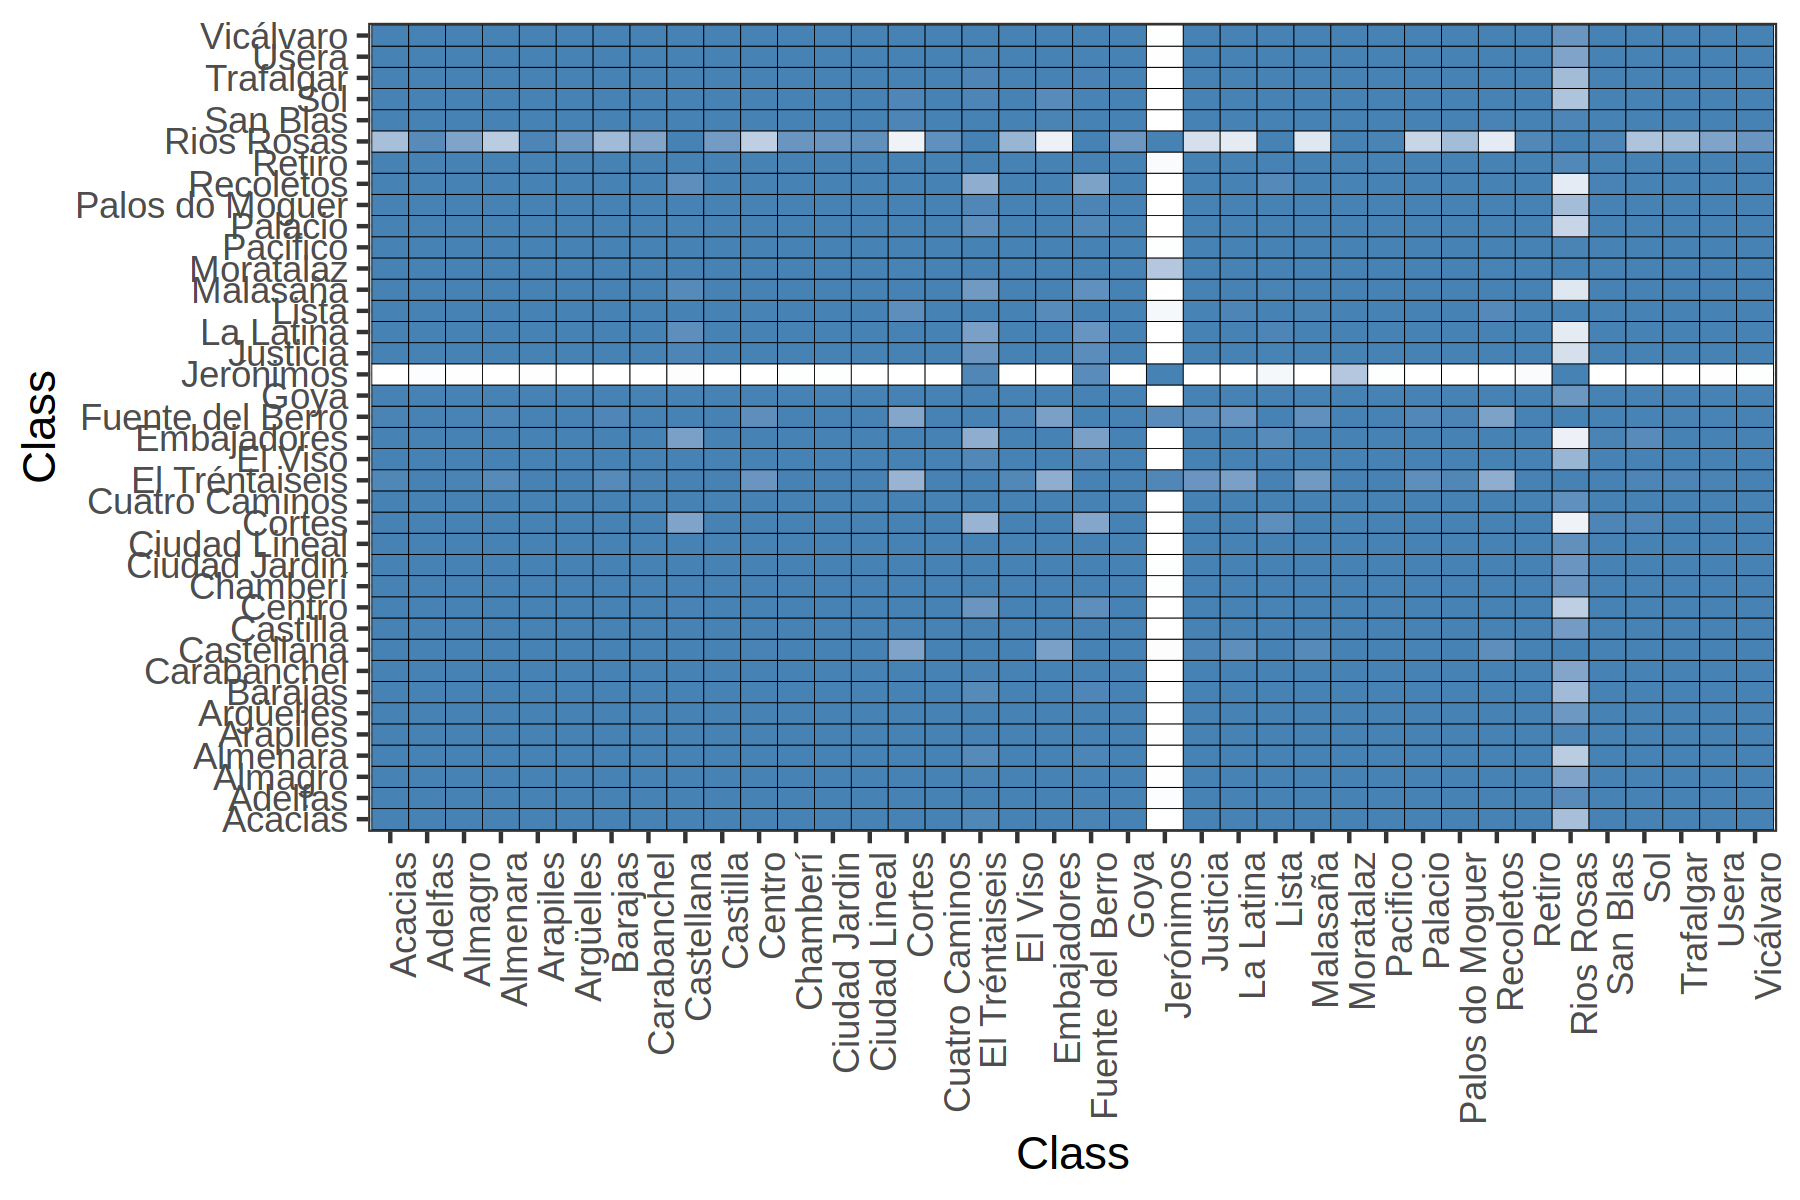

In [661]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


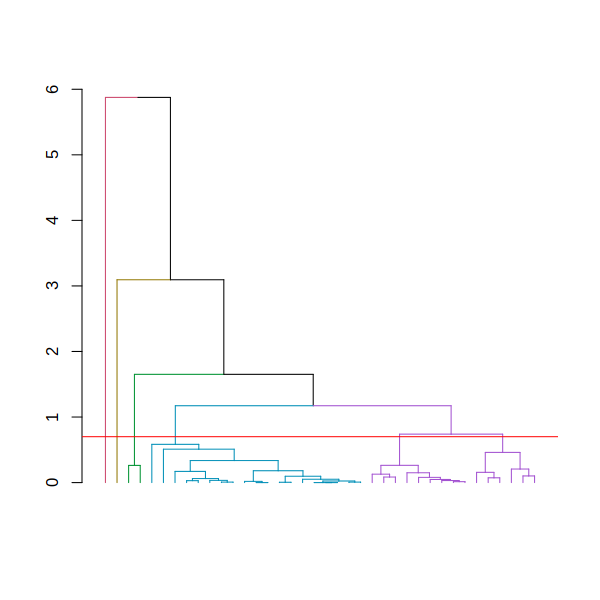

In [662]:
d <- dist(1-resm,method = "euclidean")
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
options(repr.plot.height=6,repr.plot.width=6,repr.plot.res = 100)
plot(color_branches(hcd, k=5),leaflab="none")
abline(h=0.7,col="red")

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [663]:
#El punto que se identifica es a 0.7

hc$height[hc$height>=0.7]

print('Se identifican 5 clusters')




[1] 0.7390008 1.1725977 1.6514074 3.0940941 5.8758044

[1] "Se identifican 5 clusters"


Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [664]:
nueva <- cutree_1h.dendrogram(hcd,h=0.7)

#copia para validar proceso de factor
df_madrid2 <- df_madrid
df_madrid2 <- df_madrid2 %>% mutate(neighb_id = as.factor(nueva[match(Neighbourhood, cn)]))

summary(df_madrid2)





     Neighbourhood   Accommodates      Bathrooms        Bedrooms    
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.00  
 Sol        : 536   Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.00  
 (Other)    :1705                    NA's   :14      NA's   :7      
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 323.0   Median : 2.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 406.7   Mean   : 1.954  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :800.00  

In [737]:
#Separamos las filas que si tienen Square.Meters definido

#df_madrid_con_m2 <- df_madrid2[!is.na(df_madrid2$Square.Meters), ]
df_madrid_con_m2 <- na.omit(df_madrid2)

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [738]:
set.seed(123)
idx<-sample(1:nrow(df_madrid_con_m2),0.7*nrow(df_madrid_con_m2))
df_madrid_con_m2_train<-df_madrid_con_m2[idx,]
df_madrid_con_m2_test<-df_madrid_con_m2[-idx,]

#model <- lm(Square.Meters ~ ., data = df_madrid_con_m2_train)
model <- lm(Square.Meters ~ + Neighbourhood + Accommodates + Bathrooms + Bedrooms + Beds + Price 
            + Guests.Included + Extra.People + Review.Scores.Rating, data = df_madrid_con_m2_train)
summary(model)


Call:
lm(formula = Square.Meters ~ +Neighbourhood + Accommodates + 
    Bathrooms + Bedrooms + Beds + Price + Guests.Included + Extra.People + 
    Review.Scores.Rating, data = df_madrid_con_m2_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.610  -7.101   0.018   8.658  99.610 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)   
(Intercept)                  -45.10672   40.79031  -1.106  0.27208   
NeighbourhoodAlmagro         -14.70405   31.36372  -0.469  0.64046   
NeighbourhoodAlmenara          9.91943   21.93079   0.452  0.65226   
NeighbourhoodArapiles         18.36651   32.72731   0.561  0.57621   
NeighbourhoodArgüelles         6.21665   22.94289   0.271  0.78711   
NeighbourhoodBarajas         -23.66917   32.00178  -0.740  0.46167   
NeighbourhoodCarabanchel       8.55372   33.51141   0.255  0.79918   
NeighbourhoodCastilla         -5.05232   25.50256  -0.198  0.84346   
NeighbourhoodCentro          -35.60077   32.11217  -1.109  

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [739]:
model2 <- lm(Square.Meters ~ + Neighbourhood + Accommodates + Bathrooms + Bedrooms + Beds + Price 
            + Guests.Included + Extra.People + Review.Scores.Rating, data = df_madrid_con_m2_test)
summary(model)


Call:
lm(formula = Square.Meters ~ +Neighbourhood + Accommodates + 
    Bathrooms + Bedrooms + Beds + Price + Guests.Included + Extra.People + 
    Review.Scores.Rating, data = df_madrid_con_m2_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.610  -7.101   0.018   8.658  99.610 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)   
(Intercept)                  -45.10672   40.79031  -1.106  0.27208   
NeighbourhoodAlmagro         -14.70405   31.36372  -0.469  0.64046   
NeighbourhoodAlmenara          9.91943   21.93079   0.452  0.65226   
NeighbourhoodArapiles         18.36651   32.72731   0.561  0.57621   
NeighbourhoodArgüelles         6.21665   22.94289   0.271  0.78711   
NeighbourhoodBarajas         -23.66917   32.00178  -0.740  0.46167   
NeighbourhoodCarabanchel       8.55372   33.51141   0.255  0.79918   
NeighbourhoodCastilla         -5.05232   25.50256  -0.198  0.84346   
NeighbourhoodCentro          -35.60077   32.11217  -1.109  

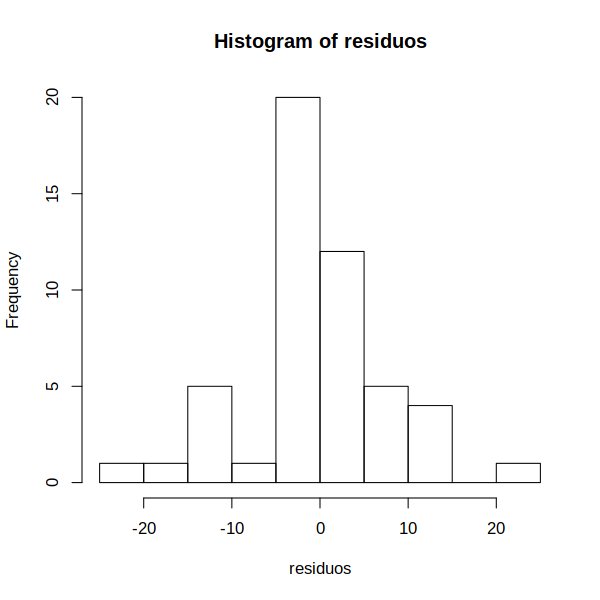

In [741]:
residuos <- residuals(model2)
hist(residuos, breaks = 10)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [742]:
subset(df_madrid_con_m2_test, Neighbourhood == "Sol" & Accommodates == 6 & Bathrooms == 1)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
6055,Sol,6,1,2,3,102,807,1,11,80,40.41977,-3.699911,74.97272,2


In [743]:
#el número de metros cuadrados que tendría es:

metros <- predict(model, data.frame(Neighbourhood = "Sol", Accommodates = 6, Bathrooms = 1, Bedrooms = 3, Beds = 3, 
                          Price = 80, Review.Scores.Rating = 80, Square.Feet = 807, Guests.Included = 1,
                          Extra.People = 11))
print(metros)

       1 
88.66705 


In [744]:
#¿Como varía sus metros cuadrados con cada habitación adicional?


prediccion <- predict(model, 
                      data.frame(Neighbourhood = "Sol", Accommodates = 6, Bathrooms = c(1,2,3,4,5,6,7,8,9,10), Bedrooms = 3, Beds = 3, 
                          Price = 80, Review.Scores.Rating = 80, Square.Feet = 807, Guests.Included = 1,
                          Extra.People = 11))

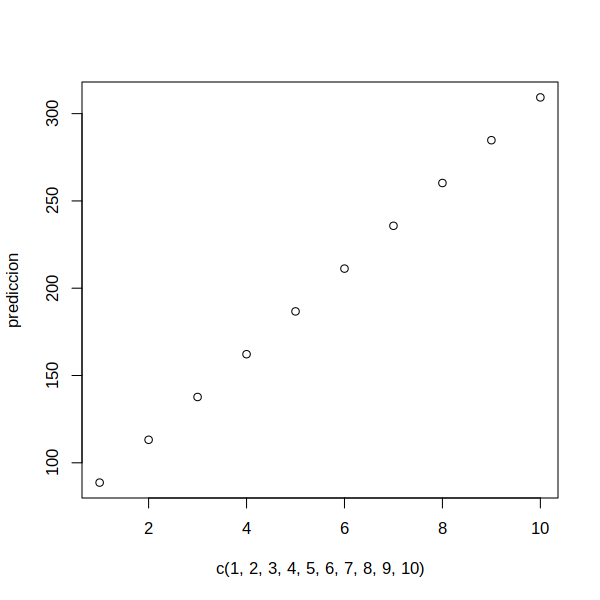

In [745]:
plot(c(1,2,3,4,5,6,7,8,9,10), prediccion)


Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [746]:
df_madrid3 <- df_madrid
summary(df_madrid3)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms    
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.00  
 Sol        : 536   Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.00  
 (Other)    :1705                    NA's   :14      NA's   :7      
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 323.0   Median : 2.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 406.7   Mean   : 1.954  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :800.00  

In [747]:
df_madrid3$Square.Meters <- ifelse(is.na(df_madrid3$Square.Meters),metros, df_madrid3$Square.Meters)
summary(df_madrid3)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms    
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.00  
 Sol        : 536   Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.00  
 (Other)    :1705                    NA's   :14      NA's   :7      
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 323.0   Median : 2.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 406.7   Mean   : 1.954  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :800.00  

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [803]:
df_madrid4 <- na.omit(df_madrid3)
summary(df_madrid4)

     Neighbourhood  Accommodates      Bathrooms        Bedrooms   
 Sol        :55    Min.   : 2.000   Min.   :1.000   Min.   :0.00  
 Malasaña   :49    1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.00  
 La Latina  :41    Median : 4.000   Median :1.000   Median :1.00  
 Embajadores:36    Mean   : 4.339   Mean   :1.249   Mean   :1.48  
 Cortes     :28    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:2.00  
 Justicia   :15    Max.   :16.000   Max.   :5.000   Max.   :5.00  
 (Other)    :95                                                   
      Beds            Price         Square.Feet     Guests.Included
 Min.   : 1.000   Min.   : 30.00   Min.   :   0.0   Min.   :1.000  
 1st Qu.: 1.000   1st Qu.: 60.00   1st Qu.:   0.0   1st Qu.:1.000  
 Median : 2.000   Median : 75.00   Median : 323.0   Median :2.000  
 Mean   : 2.514   Mean   : 88.19   Mean   : 397.7   Mean   :2.119  
 3rd Qu.: 3.000   3rd Qu.: 95.00   3rd Qu.: 646.0   3rd Qu.:2.000  
 Max.   :16.000   Max.   :500.00   Max.   :5167.0   Max.

In [805]:
#normaliza los datos
df_madrid4$Neighbourhood <- as.numeric(df_madrid4$Neighbourhood)
#df_madrid_norm <- scale(df_madrid4)
#summary(df_madrid_norm)

In [806]:
pca <- prcomp(df_madrid4, center = TRUE, scale. = TRUE)

In [807]:
str(pca)

List of 5
 $ sdev    : num [1:13] 2.166 1.26 1.058 0.96 0.957 ...
 $ rotation: num [1:13, 1:13] 0.054 0.4 0.359 0.393 0.378 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:13] "Neighbourhood" "Accommodates" "Bathrooms" "Bedrooms" ...
  .. ..$ : chr [1:13] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:13] 179.53 4.34 1.25 1.48 2.51 ...
  ..- attr(*, "names")= chr [1:13] "Neighbourhood" "Accommodates" "Bathrooms" "Bedrooms" ...
 $ scale   : Named num [1:13] 99.63 2.043 0.538 0.924 1.844 ...
  ..- attr(*, "names")= chr [1:13] "Neighbourhood" "Accommodates" "Bathrooms" "Bedrooms" ...
 $ x       : num [1:319, 1:13] -1.083 0.795 4.446 -0.482 0.888 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:319] "31" "184" "284" "285" ...
  .. ..$ : chr [1:13] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [809]:
# selecciona el departamento de prueba

departamento <- subset(df_madrid4, Neighbourhood == 109 & Accommodates == 3 & Review.Scores.Rating == 83)
departamento

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
31,109,3,1,1,2,75,0,2,9,83,40.41267,-3.704507,88.66705


In [811]:
#transforma el departamento de prueba

departamento_pca <- predict(pca, newdata=departamento)

In [828]:
# calcula las distancias entre el departamento y el resto

distancia <- dist(rbind(departamento_pca, predict(pca, newdata=df_madrid4)))


In [829]:
#ordena las distancias con df_madrid4

df_madrid4$distance <- distancia[1:nrow(df_madrid4)]

In [830]:
df_madrid4 <- df_madrid4[order(df_madrid4$distance),]

In [833]:
similares <- df_madrid4[1:5,]
similares

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,distance
,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
31,109,3,1,1,2,75,0,2,9,83,40.41267,-3.704507,88.66705,1.851853e-16
7383,109,3,1,1,1,76,40,2,11,89,40.42066,-3.704940,88.66705,1.069677e+00
3641,179,4,1,1,1,81,55,2,11,86,40.41304,-3.705678,88.66705,1.109143e+00
12045,77,2,1,1,1,86,55,2,11,80,40.41476,-3.693633,88.66705,1.111437e+00
9488,109,4,1,1,3,73,0,2,15,87,40.40938,-3.701444,88.66705,1.117268e+00


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?